In [1]:
# Data from the Titanic
# Excerice for pivot tables
# numpy, pandas, and matplotlib

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib notebook

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
titanic['age'].min(), titanic['age'].max()`

(0.42, 80.0)

In [32]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [33]:
titanic['survived'].value_counts() * 100 / len(titanic)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [35]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [36]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

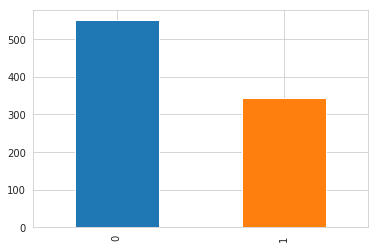

In [44]:
titanic['survived'].value_counts().plot(kind='bar')

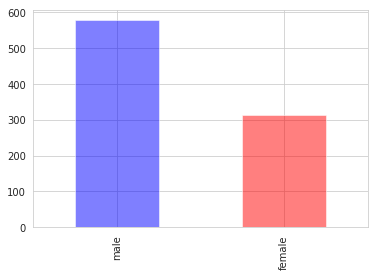

In [49]:
alpha_color = 0.5

titanic['sex'].value_counts().plot(kind='bar',
                                  color=['b','r'],
                                  alpha=alpha_color)

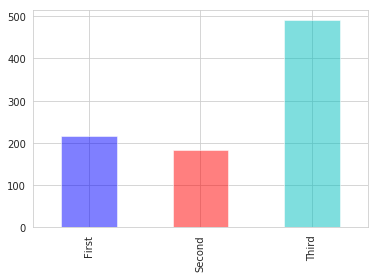

In [51]:
titanic['class'].value_counts().sort_index().plot(kind='bar',
                                  color=['b','r','c'],
                                  alpha=alpha_color)

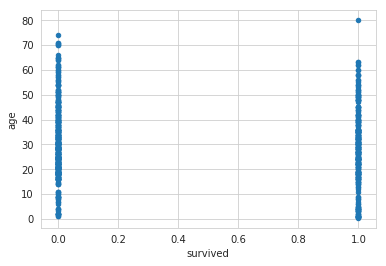

In [53]:
titanic.plot(kind= 'scatter', x= 'survived' ,y= 'age')

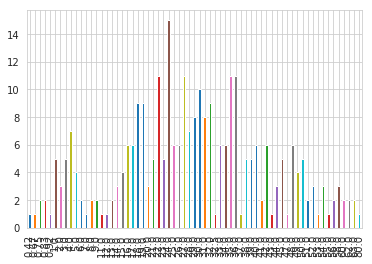

In [55]:
titanic[titanic['survived'] == 1]['age'].value_counts().sort_index().plot(kind='bar')

In [57]:
bins = [0,10,20,30,40,50,60,70,80]

titanic['AgeBin'] = pd.cut(titanic['age'], bins)

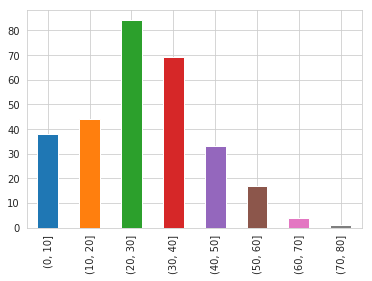

In [58]:
titanic[titanic['survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

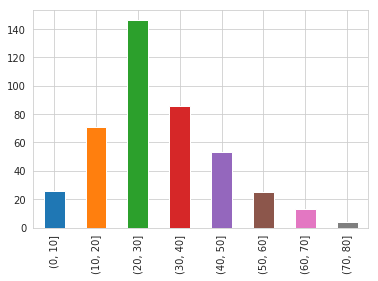

In [59]:
titanic[titanic['survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

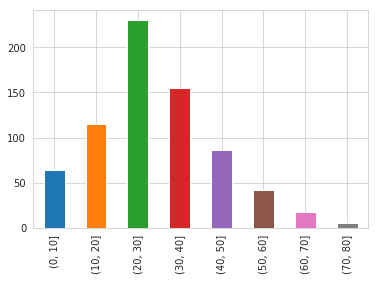

In [60]:
titanic['AgeBin'].value_counts().sort_index().plot(kind='bar')

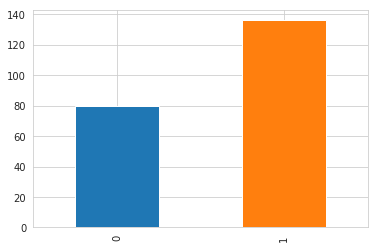

In [63]:
titanic[titanic['class'] == 'First']['survived'].value_counts().sort_index().plot(kind='bar')

In [66]:
# Here you can see the difference between the survival of First and Third class passengers

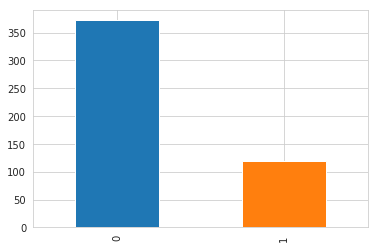

In [65]:
titanic[titanic['class'] == 'Third']['survived'].value_counts().sort_index().plot(kind='bar')

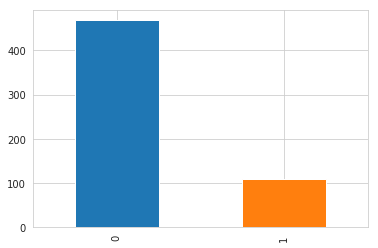

In [67]:
titanic[titanic['sex'] == 'male']['survived'].value_counts().sort_index().plot(kind='bar')

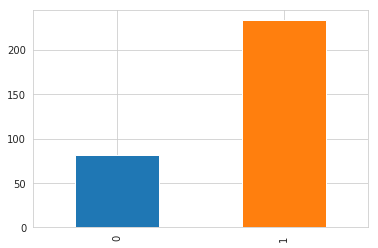

In [68]:
titanic[titanic['sex'] == 'female']['survived'].value_counts().sort_index().plot(kind='bar')

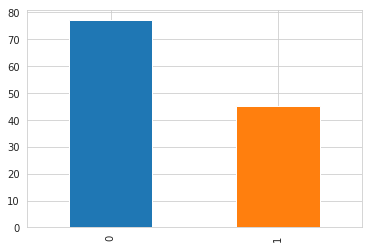

In [71]:
titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'First')]['survived'].value_counts().sort_index().plot(kind='bar')

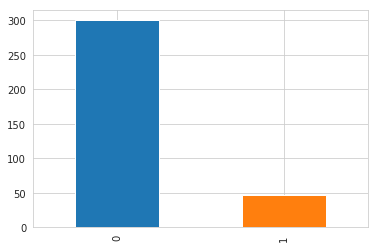

In [72]:
titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'Third')]['survived'].value_counts().sort_index().plot(kind='bar')

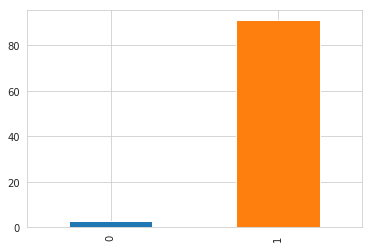

In [73]:
titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First')]['survived'].value_counts().sort_index().plot(kind='bar')

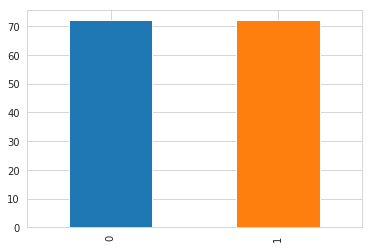

In [76]:
titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'Third')]['survived'].value_counts().sort_index().plot(kind='bar')

In [6]:
# Creates a CSV file for all the Titanic Data
titanic.to_csv(r"/home/cambam/Desktop/titanic.csv")

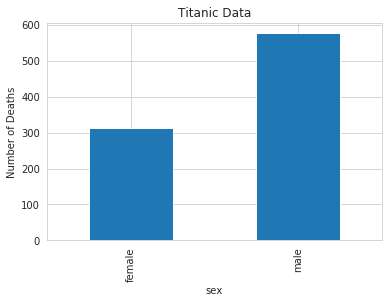

In [42]:
df = titanic.groupby('sex')[['survived']].count()
df.plot.bar()
plt.ylabel('Number of Deaths')
plt.title('Titanic Data')
plt.legend().remove()

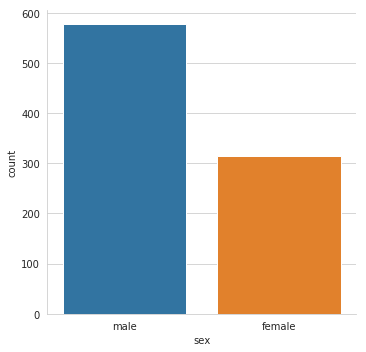

In [39]:
# A different way to see the same data

sns.factorplot('sex',data=titanic,kind='count')

In [10]:
# Creating a DataFrame to plot
result = pd.pivot_table(titanic, index='survived', 
                        columns='sex', 
                        values='pclass',
                        aggfunc=np.sum)

In [11]:
# confirming the DataFrame information is correct
# type(result)
result

sex,female,male
survived,,
0,231,1159
1,447,220


Text(0.5,1,'Titanic Data')

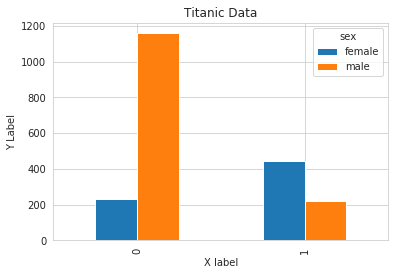

In [12]:
# Plotting the DataFrame 
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')

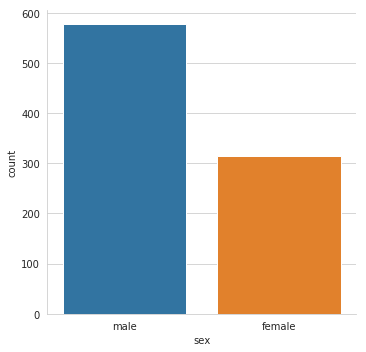

In [13]:
sns.factorplot('sex',data=titanic,kind='count')

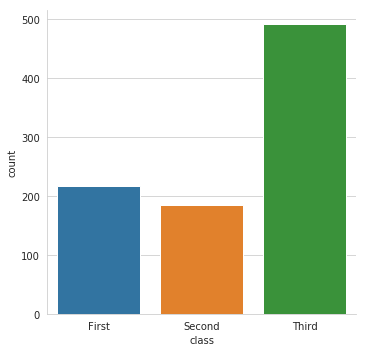

In [14]:
#Bar chart showing the number of passengers by class
sns.factorplot('class', data=titanic, kind='count')

In [15]:
# Creating a DataFrame to plot how many survived by class
result = pd.pivot_table(titanic, index='pclass', 
                        columns='sex', 
                        values='survived',
                        aggfunc=np.sum)

In [16]:
result

sex,female,male
pclass,,
1,91,45
2,70,17
3,72,47


Text(0.5,1,'Titanic Data')

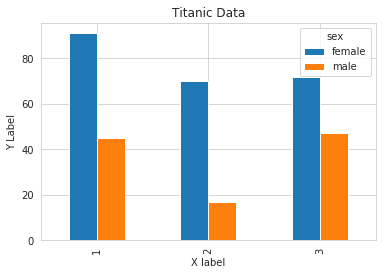

In [17]:
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')

In [18]:
# Here I'm finding the women and men that dead by class

In [19]:
w_d_1 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'First')

In [20]:
w_d_2 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'Second')

In [21]:
w_d_3 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'Third')

In [22]:
print(w_d_1.sum(), w_d_2.sum(), w_d_3.sum())

3 6 72


In [23]:
m_d_1 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'First')

In [24]:
m_d_2 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'Second')

In [25]:
m_d_3 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'Third')

In [26]:
print(m_d_1.sum(), m_d_2.sum(), m_d_3.sum())

77 91 300
